# Movie Recommender Systems

<img style="float: right" src="https://miro.medium.com/max/1200/1*l9dIvOVH5KhpK1LFvgoClA.jpeg" width="800" height="500" alt="Drawing" style="float: centre;"/>

<h3>Table_of_Content</h3>

[<h5>1.Introduction</h5>](#Introduction)

[<h5>2.Problem Statement</h5>](#Problem_Statement)

[<h5>3.Importing Packages</h5>](#Importing_Packages)

[<h5>4.Loading the data</h5>](#Loading_the_data)

[<h5>5.Exploratory data analysis</h5>](#Exploratory_data_analysis)

[<h5>6.Data cleaning and Feature engineering</h5>](#Data_cleaning_and_Feature_engineering)

[<h5>7.Modeling</h5>](#.Modeling)

[<h5>8.Model Performance</h5>](#Model_Performance)

[<h5>9.Model Explanation</h5>](#Model_Explanation)

[<h5>10.Conclussion</h5>](#Conclussion)


## Introduction


Recommender systems are machine learning systems that help users discover new products and services. Every time you shop online, a  recommendation system is guiding you towards the most likely product you might purchase.

Recommender systems are an essential feature in our digital world, as users are often overwhelmed by choice and need help finding what they're looking for. This leads to happier customers and, of course, more sales. Recommender systems are like salesmen who know, based on your history and preferences, what you like.

Recommender systems are so commonplace now that many of us use them without even knowing it. Because we can't possibly look through all the products or content on a website, a recommendation system plays an important role in helping us have a better user experience, while also exposing us to more inventory we might not discover otherwise. 

Some examples of recommender systems in action include product recommendations on Amazon, Netflix suggestions for movies and TV shows in your feed, recommended videos on YouTube, music on Spotify, the Facebook newsfeed and Google Ads.

<img style="float: right" src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Recommender%2520Function.png" width="800" height="500" alt="Drawing" style="float: centre;"/>

## Problem_Statement


Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

## Version Control


In [1]:
#install comet ml
!pip install comet_ml


In [2]:
# point comet_ml SDK to www.comet.com installation
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rOl6aNOtrWiZQfN2Rag8JJNiZ",
    project_name="recommendation-systems",
    workspace="phillemon",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/phillemon/recommendation-systems/c27ea94b0d744d52b876cab6b41c31d2



In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#install surprise
!pip install surprise

# **import libraries**

In [124]:
# Importing packages
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from surprise.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from surprise.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise import SVD
from surprise import SVD, NMF
from surprise import KNNBasic
from surprise import SlopeOne
from surprise import Reader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large list



## Loading_the_Data

In [6]:
#defining a function to display the datasets
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [7]:

movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags= pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
test = pd.read_csv('test.csv')
links = pd.read_csv('links.csv')
sample_submission = pd.read_csv('sample_submission.csv')
tags = pd.read_csv('tags.csv')


#we will take a look at the fisrt few coulmns on the loaded data set
display('movies.head()', 'train.head()', 'genome_scores.head()',
        'genome_tags.head()'
       , 'imdb.head()', 'links.head()', 'sample_submission.head()',
        'tags.head()', 'test.head()')


movies.head()
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

train.head()
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

genome_scores.head()
   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

genome_tags.head()
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

imdb.head()
   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion  

links.head()
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

sample_submission.head()
       Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

tags.head()
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

test.head()
   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

### merging and preprocessing the data

#### basic analysis 


In [8]:
f1=pd.merge(movies, train, on='movieId')
f1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In [9]:
#checking for mismatches
#Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls
f1.isnull().any()

movieId      False
title        False
genres       False
userId       False
rating       False
timestamp    False
dtype: bool

In [10]:
f1.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
#we will perform EDA on the F2(from train,movies and IMDB merge ) since it contains infromation about the movies and users
f1.describe

<bound method NDFrame.describe of           movieId                           title  \
0               1                Toy Story (1995)   
1               1                Toy Story (1995)   
2               1                Toy Story (1995)   
3               1                Toy Story (1995)   
4               1                Toy Story (1995)   
...           ...                             ...   
10000033   209145                  Liberté (2019)   
10000034   209153             Happy Flight (2008)   
10000035   209159       Window of the Soul (2001)   
10000036   209169             A Girl Thing (2001)   
10000037   209171  Women of Devil's Island (1962)   

                                               genres  userId  rating  \
0         Adventure|Animation|Children|Comedy|Fantasy  158849     5.0   
1         Adventure|Animation|Children|Comedy|Fantasy   97203     5.0   
2         Adventure|Animation|Children|Comedy|Fantasy  161871     3.0   
3         Adventure|Animation|Childre

In [12]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


In [13]:
f1.shape

(10000038, 6)

# ***Exploratory Data Analysis***

C:\Users\peter selolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



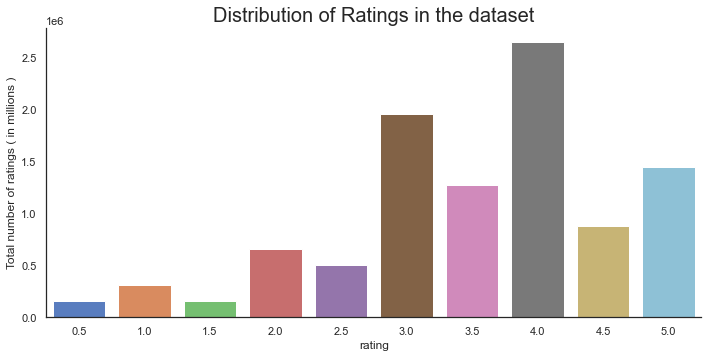

In [14]:
with sns.axes_style('white'):
    g = sns.catplot("rating", data=f1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings ( in millions )")
    plt.title("Distribution of Ratings in the dataset", fontsize = 20)


**Observations:**

majority of the users gave a recommendation of 4 with fewer individuals giving a rating of less than 3


#####
###
####
###

Next we will explore the data deeply to see how each movie is rated and also check on the most rated movies

In [15]:
# Get the  avarage rating for each movie in the data 
average_ratings= f1.groupby(['movieId','genres']).mean()['rating'].reset_index()

In [16]:
f1 = f1.merge(average_ratings, on = 'movieId')

In [17]:
#verify that the above code is applies we review the fisrt two raws
f1.head(2)

,movieId,title,genres_x,userId,rating_x,timestamp,genres_y,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786,Adventure|Animation|Children|Comedy|Fantasy,3.889971
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155,Adventure|Animation|Children|Comedy|Fantasy,3.889971


In [18]:
f1.drop(columns=['rating_y','genres_y'],inplace=True) # Delete the duplicated columns

f1.rename(columns={'genres_x':'genres','rating_x':'rating'},inplace=True) # Rename the columns

# Show the  first 5 observations
f1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In [19]:
f1['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Animation|Children|Comedy|Fantasy|Horror',
       'Children|Comedy|Fantasy|Mystery',
       'Comedy|Horror|Mystery|Sci-Fi|Western'], dtype=object)

In [20]:
#Function to get the first top 10 titles by ratings
def plot_by_ratings(df,column, n):
    plt.figure(figsize=(10,6))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data, order= data.index, y = data.index, palette='rocket', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Number of ratings')
    plt.ylabel('Movie Title')
    plt.xticks(rotation=90)
    plt.show()

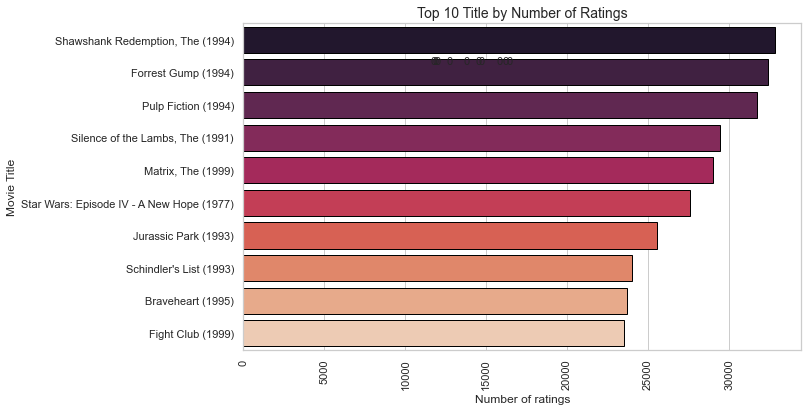

In [21]:
# Function applied to merged data
plot_by_ratings(f1,'title',10)

## Preprocessing and Feature Engineering

The goal of dimensionality reduction is to reduce the number of features in a dataset while minimising the amount of data loss

#### For pre processing we wil perform :

* Scaling
* Principle component Analysis
* Cosine similarity check
* Recommender systems


The Dataset contain too large values.To reduce computational power, we are going to be looking at the top ten movies and selecting only those with a rating of more than 2000

In [22]:
#Filtering applied to train dataset
#pre_scaled=train.groupby("movieId").filter(lambda x:x['rating'].count() >=2000)
#print("the filtered dataset consist of :")
#pre_scaled.shape[0]

In [23]:
f1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


Labels are not used in an unsupervised learning environment

In [66]:
# create short list of unwanted columns
labels = ['title', 'genres']

# declare the features to be all columns, less the unwanted ones from above
features = [col for col in train.columns if col not in labels]

In [67]:
# Scaling the movies_df
# declare the features to be all columns from our movies_df
#features = [col for col in f1.columns]

# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
scaled_df = train.copy()
scaled_df[features] = preprocessing.scale(scaled_df[features])

C:\Users\peter selolo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



Text(0, 0.5, 'Cumulative explained variance')

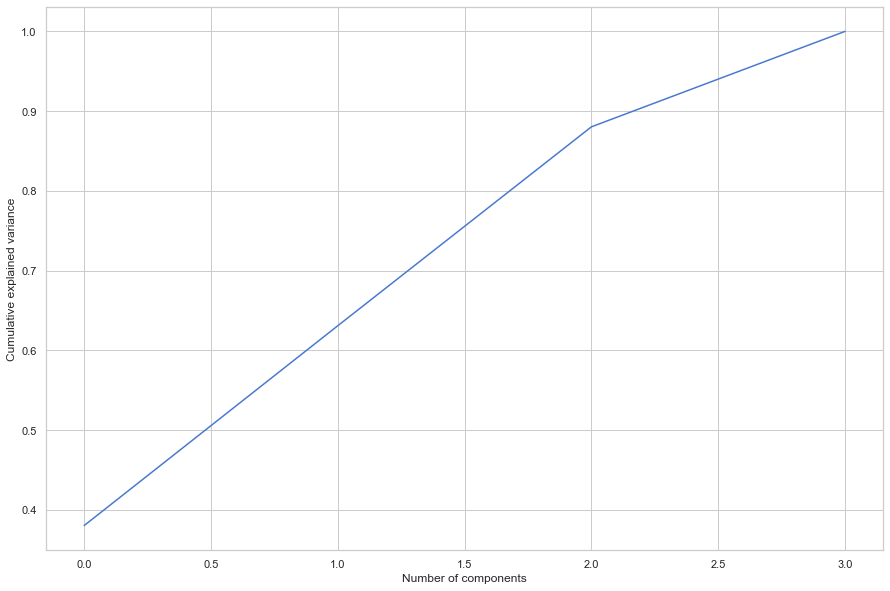

In [68]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(scaled_df[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)



# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Looking at the graph, it appears roughly 3 components will explain 87% of the data. That is a significant reduction - from 6 features down to 3. Interestingly, it appears that close to 100% of the variance is explained by the first 3 components, itself a significant reduction

Next we will determine how many principal components will be required to explain 85% of the variance in our dataset.

In [69]:
pca_85 = PCA(.85)
pca_85.fit_transform(scaled_df[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 3 components.


In [70]:
#Let's take a look at the variance explained by the first few components
pca.explained_variance_ratio_[:3]

array([0.3802045 , 0.25060905, 0.24947369])

#### Observations from pca
The first component explains 38%, with the 2nd following closely behind at 25% and the 3rd at 25%. Together, the 86% of the variance is explained by the first three components.

Putting Our Dimensionality Reduction to Use
We have seen that just 3 components of an original 6 can be used to explain 88% of the variance in our dataset. Let us now utilise our reduced dataset, consisting of just 3 components, by using it to build a predictive regressor model.

We will use the feature named rating  as the response variable (the one that we will try to predict). This feature was used in our initial PCA, so we will have to make some changes to the dataset to ensure it is not included this time.

PCA requires features to be scaled. But we don't need to scale the response variable which we will use for prediction, as it is not used in PCA. This is good, because leaving the response as is means any predicted values and associated errors are easier to interpret

#### cosine similarity pre processing

In [71]:
#make a copy of the movies dataframe to work with
movies_copy = movies.copy()

In [72]:
#filter movies dataset to take only 20000 movies to reduce computational power 
r_movies = movies_copy[0:20000]

In [73]:
#select and display the desired column to be used for checking similarity(genres column)
r2_movies = r_movies['genres']
r2_movies

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
19995                                         Comedy
19996                                    Documentary
19997                                    Documentary
19998                           Crime|Horror|Mystery
19999                                          Drama
Name: genres, Length: 20000, dtype: object

In [74]:
#creating indices used to keep track of numbering of all entities in the movie column

titles = r_movies['title']
indices = pd.Series(r_movies.index, index=r_movies['title'])
titles

0                                   Toy Story (1995)
1                                     Jumanji (1995)
2                            Grumpier Old Men (1995)
3                           Waiting to Exhale (1995)
4                 Father of the Bride Part II (1995)
                            ...                     
19995                                   Joker (2012)
19996                                   Gitmo (2005)
19997    My Avatar and Me (Min Avatar og mig) (2010)
19998                 Blood Beast Terror, The (1968)
19999                                 Othello (1981)
Name: title, Length: 20000, dtype: object

We now need a mechanism to convert these textual features into a format which enables us to compute their relative similarities to one another. This will allow us to translate our string-based collection of tags and authors into numerical vectors

In [75]:
#converting textual data to numerical
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
tf_tag_ti_gen_matrix = tf.fit_transform(r2_movies)

## Modelling 

### Content based filtering

Content-based filtering is one popular technique of recommendation or recommender systems. The content or attributes of the things you like are referred to as "content." 

Here, the system uses your features and likes in order to recommend you with things that you might like. It uses the information provided by you over the internet and the ones they are able to gather and then they curate recommendations according to that.  
The goal behind content-based filtering is to classify products with specific keywords, learn what the customer likes, look up those terms in the database, and then recommend similar things.

This type of recommender system is hugely dependent on the inputs provided by users, some common examples included Google, Wikipedia, etc. For example, when a user searches for a group of keywords, then Google displays all the items consisting of those keywords. The below video explains how a content-based recommender works.

#### Advantages

* The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier     to scale to a large number of users.
* The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested   in.

#### Disadvantages

* Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain       knowledge. Therefore, the model can only be as good as the hand-engineered features.
* The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability   to expand on the users' existing interests.

We are going to compute the similarity between each vector within our matrix.
This is done by making use of the cosine_similarity function 
provided to us by sklearn

In [76]:
cosine_sim_tags = cosine_similarity(tf_tag_ti_gen_matrix, 
                                        tf_tag_ti_gen_matrix)
print (cosine_sim_tags.shape)

(20000, 20000)


In [79]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string movie title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_tags[b_idx]))
    
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [80]:
#tyjk
content_generate_top_N_recommendations("Grumpier Old Men (1995)")

6                          Sabrina (1995)
38                        Clueless (1995)
63                   Two if by Sea (1996)
67     French Twist (Gazon maudit) (1995)
116                   If Lucy Fell (1996)
120                      Boomerang (1992)
127                 Pie in the Sky (1996)
178                       Mallrats (1995)
184                    Nine Months (1995)
Name: title, dtype: object

In [101]:
def content_generate_rating_estimate(movie_title, userId, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==userId].iterrows():
        sim = cosine_sim_tags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [102]:
f1[f1['userId'] == 314][3:10]

,movieId,title,genres,userId,rating,timestamp
436915,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,314,4.0,843572732
489881,168,First Knight (1995),Action|Drama|Romance,314,4.0,843573572
650782,252,I.Q. (1994),Comedy|Romance,314,4.0,843573423
738038,282,Nell (1994),Drama,314,3.0,843573308
990095,356,Forrest Gump (1994),Comedy|Drama|Romance|War,314,4.0,843572792
1067419,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,314,3.0,843572913
1133068,383,Wyatt Earp (1994),Western,314,4.0,843576295


In [103]:
#let us see how our defined model performs

In [104]:
title = "Batman Forever (1995)"
actual_rating = f1[(f1['userId'] == 314) & (f1['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, userId=314, rating_data=f1)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Batman Forever (1995)
---
Actual rating: 		 4.0
Predicted rating: 	 3.7376935837355854


### Collaborative filtering

Methods for recommender systems that are primarily based on previous interactions between users and the target items are known as collaborative filtering methods. 

As a result, all past data about user interactions with target objects will be fed into a collaborative filtering system. This information is usually recorded as a matrix, with the rows representing users and the columns representing items.

The basic premise of such systems is that the users' previous data should be sufficient to generate a prediction. That is, we don't require anything other than historical data, no more user input, no current trending data, and so on.

In [47]:
#Trainset split
train_df = train.copy()
train_df.drop('timestamp', axis=1, inplace=True)
# reduce the dataset by making a subset of the original data set
subset = train_df[:100000]
reader = Reader(rating_scale=(subset['rating'].min(), subset['rating'].max()))
data = Dataset.load_from_df(subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

In [111]:
nmf = NMF()

# Train the algorithm on the trainset, and predict ratings for the testset
nmf.fit(trainset)
predictions = nmf.test(testset)

# Compute RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1613


In [112]:
svd = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
svd.fit(trainset)
predictions = svd.test(testset)

# Compute RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9837


#### Why collaborative filtering is better than content-based filtering?

Content-based filtering :
* Content-based filtering does not require other users' data during recommendations to one user. 

Collaborative filtering System: 
* Collaborative does not need the features of the items to be given. Every user and item is described by a feature vector or       embedding. It creates embedding for both users and items on its own.


* What happens when there isn’t enough information provided by a user to make item recommendations? Well, in these cases we can   use data provided by other users with similar preferences. Methods within this category make use of the history of past         choices of a group of users in order to elicit recommendations.And that makes Collaborative filtering a powerful technique

### Hyperparameter Optimization

In [ ]:
def tune_SVD_model(X_train, y_train):
    # your code here
    D = {'C':[0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

    from sklearn.metrics import make_scorer

    grid_SVM = GridSearchCV(SVC(), param_grid = D, scoring=make_scorer(custom_scoring_function, greater_is_better = False), cv=5)
    grid_SVM.fit(X_train, y_train)

    return grid_SVM

In [127]:
param_grid = {'n_epochs':[20],    #[30,40,50],
              'n_factors':[400],   #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9725833074765273
***Best parameters:***
{'n_epochs': 20, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


In [129]:
svd = SVD(n_epochs = 20, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)
predictions = svd.test(testset)

# Compute RMSE
svd_rmse = accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9773


## Model Performance

## Conclussion

## Prepare data for Kaggle submission

In [130]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [133]:
train_df = train
test_df = test

In [134]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

#hypertuned Model
svd = SVD(n_epochs = 20, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)
predictions = svd.test(testset)

# Compute RMSE
svd_rmse = accuracy.rmse(predictions)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("CB6.csv", index=False)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7636


In [135]:
pd.read_csv("CB6.csv")

,Id,rating
0,1_2011,3.290466
1,1_4144,4.162769
2,1_5767,3.652026
3,1_6711,3.942581
4,1_7318,3.046243
...,...,...
5000014,162541_4079,3.347619
5000015,162541_4467,3.798264
5000016,162541_4980,2.621014
5000017,162541_5689,2.948807


In [136]:
#end the commet experiment
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/phillemon/recommendation-systems/c27ea94b0d744d52b876cab6b41c31d2
COMET INFO:   Parameters:
COMET INFO:     norm         : l2
COMET INFO:     smooth_idf   : True
COMET INFO:     sublinear_tf : False
COMET INFO:     use_idf      : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (51.52 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and

References
https://developers.google.com/machine-learning/recommendation/content-based/basics
https://towardsdatascience.com/introduction-to-recommender-systems-1-971bd274f421


# THE END